In [6]:
import numpy as np
# from scripts.sample import get_cfg, main
import matplotlib.pyplot as plt
from itertools import product

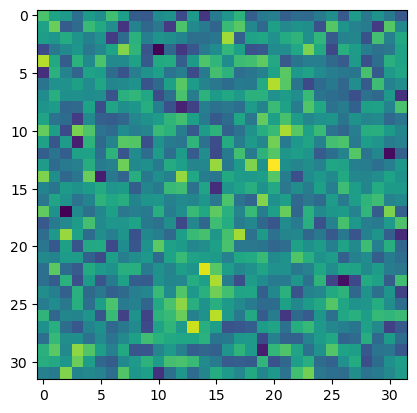

In [2]:
timestamp = 400
init_samples = np.stack([np.load("results/sde_samples_unet.npz")["states"][2, timestamp]] * 4, 0)

plt.imshow(init_samples[0, 0])

In [3]:
samples_path = "results/init_samples.npy"
np.save(samples_path, init_samples)

cfg = get_cfg()
cfg["kwargs"]["timestamp"] = timestamp
cfg["samples_path"] = samples_path
cfg["save_path"] = "results/mode_collapse_timestamp_200.npz"

main(cfg)

Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda


/home/coder/project/scripts/sample.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ddpm.load_state_dict(torch.load(cfg["ddpm_checkpoint"], map_location=torch.device('cp

In [4]:
res = np.load("results/mode_collapse_timestamp_200.npz")

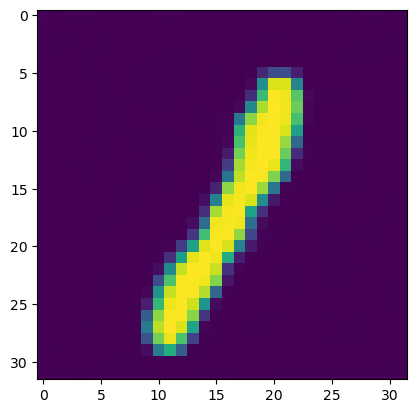

In [5]:
plt.imshow(res["x"][0, 0])

In [6]:
from itertools import product


def show_samples(timestamp, n_iter = 5, n_samples = 4):
    samples_path = "results/init_samples.npy"
    results_path = "results/mode_collapse_timestamp_200.npz"

    cfg = get_cfg()
    cfg["kwargs"]["timestamp"] = timestamp
    cfg["samples_path"] = samples_path
    cfg["save_path"] = results_path


    images = [[] for _ in range(n_iter)]
    for i in range(n_iter):
        init_image = np.load("results/sde_samples_unet.npz")["states"][i, timestamp]
        np.save(samples_path, np.stack([init_image] * n_samples, 0))
        main(cfg)
        x = np.load("results/mode_collapse_timestamp_200.npz")["x"]

        images[i].append(init_image[0])
        images[i].extend(x)


    plt.figure(figsize=(5, 5))
    for i, j in product(range(n_iter), range(n_samples + 1)):
        plt.subplot(n_iter, n_samples + 1, i * (n_samples + 1) + j + 1)
        plt.imshow(images[i][j].reshape(32, 32))
        plt.axis("off")

    plt.tight_layout()
    plt.show()

/home/coder/project/scripts/sample.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ddpm.load_state_dict(torch.load(cfg["ddpm_checkpoint"], map_location=torch.device('cp

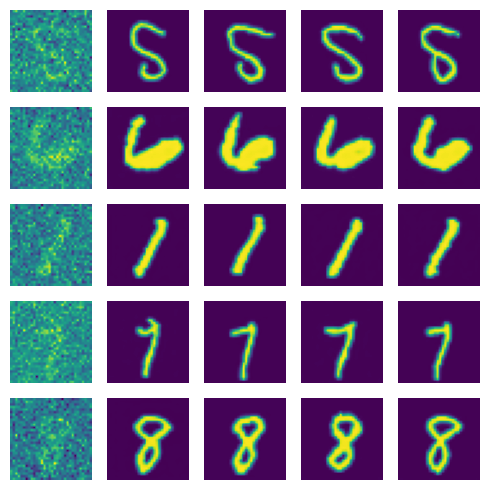

In [8]:
show_samples(300)

/home/coder/project/scripts/sample.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ddpm.load_state_dict(torch.load(cfg["ddpm_checkpoint"], map_location=torch.device('cp

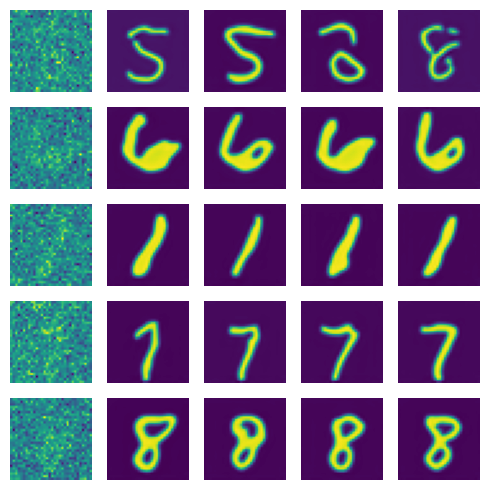

In [54]:
show_samples(400)

100%|██████████| 500/500 [00:10<00:00, 47.98it/s]


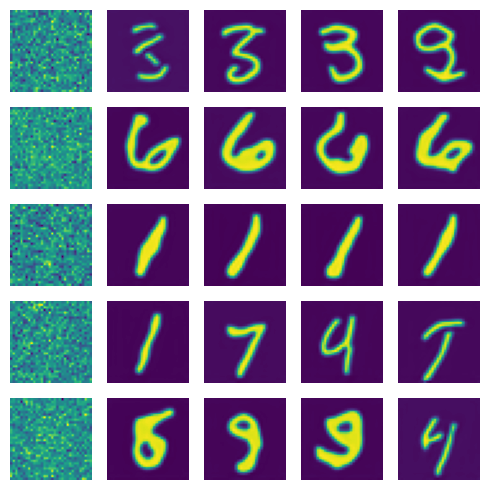

In [55]:
show_samples(500)

100%|██████████| 600/600 [00:12<00:00, 46.74it/s]


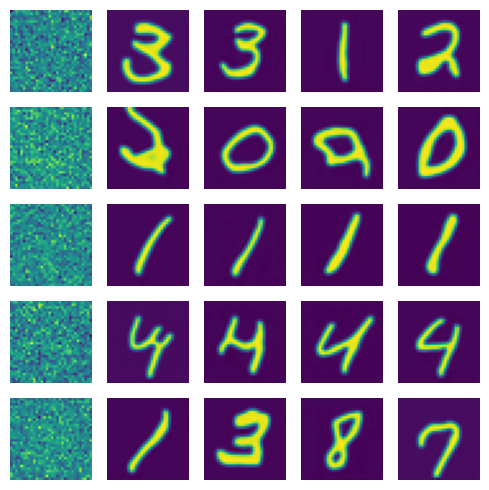

In [56]:
show_samples(600)